#  Pandas versus SQL

In [2]:
seq1= {'thyagu1','thyagu2','thyagu3'}
for x in seq1:
    print(x.upper())

THYAGU1
THYAGU2
THYAGU3


In [3]:
import numpy as np
distance = [10,15,20,16,17]
time = [2,10,15,20,16]
speed = np.array(distance)/np.array(time)
print(speed)

[5.         1.5        1.33333333 0.8        1.0625    ]


# 10 Minutes Pandas 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation 

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,-1.791955,1.685575,1.117612,-1.533397
2013-01-02,-0.237778,1.438772,0.063511,-1.982113
2013-01-03,1.550898,-0.496857,0.776658,-1.610976
2013-01-04,-0.010489,1.387500,-1.478615,1.439234
2013-01-05,0.976436,0.380486,0.358476,-0.186277
2013-01-06,0.189046,-1.687001,-0.900136,-2.669497


### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [10]:
df2 = pd.DataFrame({ 'A' : 1.,
                        'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : pd.Categorical(["test","train","test","train"]),
                        'F' : 'foo' })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data

In [13]:
df.head()

,A,B,C,D
2013-01-01,-1.791955,1.685575,1.117612,-1.533397
2013-01-02,-0.237778,1.438772,0.063511,-1.982113
2013-01-03,1.550898,-0.496857,0.776658,-1.610976
2013-01-04,-0.010489,1.387500,-1.478615,1.439234
2013-01-05,0.976436,0.380486,0.358476,-0.186277


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-1.79195499,  1.68557451,  1.11761245, -1.53339691],
       [-0.23777827,  1.43877232,  0.06351121, -1.9821127 ],
       [ 1.55089788, -0.49685733,  0.77665823, -1.61097581],
       [-0.01048937,  1.38749985, -1.47861536,  1.43923423],
       [ 0.97643629,  0.38048627,  0.35847624, -0.18627652],
       [ 0.18904615, -1.68700145, -0.90013559, -2.669497  ]])

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.112693,0.451412,-0.010415,-1.090504
std,1.147694,1.330515,0.998067,1.481380
min,-1.791955,-1.687001,-1.478615,-2.669497
25%,-0.180956,-0.277521,-0.659224,-1.889328
50%,0.089278,0.883993,0.210994,-1.572186
75%,0.779589,1.425954,0.672113,-0.523057
max,1.550898,1.685575,1.117612,1.439234


In [18]:
# Transpose of data 
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.791955,-0.237778,1.550898,-0.010489,0.976436,0.189046
B,1.685575,1.438772,-0.496857,1.387500,0.380486,-1.687001
C,1.117612,0.063511,0.776658,-1.478615,0.358476,-0.900136
D,-1.533397,-1.982113,-1.610976,1.439234,-0.186277,-2.669497


### Sorting by an  axis

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.533397,1.117612,1.685575,-1.791955
2013-01-02,-1.982113,0.063511,1.438772,-0.237778
2013-01-03,-1.610976,0.776658,-0.496857,1.550898
2013-01-04,1.439234,-1.478615,1.387500,-0.010489
2013-01-05,-0.186277,0.358476,0.380486,0.976436
2013-01-06,-2.669497,-0.900136,-1.687001,0.189046


# Sorting by values:

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.189046,-1.687001,-0.900136,-2.669497
2013-01-03,1.550898,-0.496857,0.776658,-1.610976
2013-01-05,0.976436,0.380486,0.358476,-0.186277
2013-01-04,-0.010489,1.387500,-1.478615,1.439234
2013-01-02,-0.237778,1.438772,0.063511,-1.982113
2013-01-01,-1.791955,1.685575,1.117612,-1.533397


# Selection

In [21]:
df['A']

2013-01-01   -1.791955
2013-01-02   -0.237778
2013-01-03    1.550898
2013-01-04   -0.010489
2013-01-05    0.976436
2013-01-06    0.189046
Freq: D, Name: A, dtype: float64

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,-1.791955,1.685575,1.117612,-1.533397
2013-01-02,-0.237778,1.438772,0.063511,-1.982113
2013-01-03,1.550898,-0.496857,0.776658,-1.610976


# Selection by Label

In [23]:
df.loc[dates[0]]

A   -1.791955
B    1.685575
C    1.117612
D   -1.533397
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.791955,1.685575
2013-01-02,-0.237778,1.438772
2013-01-03,1.550898,-0.496857
2013-01-04,-0.010489,1.387500
2013-01-05,0.976436,0.380486
2013-01-06,0.189046,-1.687001


In [25]:
#Showing label slicing, both endpoints are included:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.237778,1.438772
2013-01-03,1.550898,-0.496857
2013-01-04,-0.010489,1.387500


In [26]:
# Reduction in the dimensions of the returned object:
df.loc['20130102',['A','B']]

A   -0.237778
B    1.438772
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
# For getting a scalar value:
df.loc[dates[0],'A']

-1.7919549919293793

In [28]:
# For getting fast access to a scalar (equivalent to the prior method):

df.at[dates[0],'A']


-1.7919549919293793

### Selection by Position


In [29]:
# Selection by Position
df.iloc[3]

A   -0.010489
B    1.387500
C   -1.478615
D    1.439234
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
# By integer slices, acting similar to numpy/python:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.010489,1.387500
2013-01-05,0.976436,0.380486


In [31]:
# By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1,2,4],[0,2]]


,A,C
2013-01-02,-0.237778,0.063511
2013-01-03,1.550898,0.776658
2013-01-05,0.976436,0.358476


In [32]:
# For slicing rows explicitly:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.237778,1.438772,0.063511,-1.982113
2013-01-03,1.550898,-0.496857,0.776658,-1.610976


In [33]:
# For slicing columns explicitly:
df.iloc[:,1:3]

,B,C
2013-01-01,1.685575,1.117612
2013-01-02,1.438772,0.063511
2013-01-03,-0.496857,0.776658
2013-01-04,1.387500,-1.478615
2013-01-05,0.380486,0.358476
2013-01-06,-1.687001,-0.900136


In [34]:
# For getting values explicitly
df.iloc[1,1]

1.4387723211942658

In [35]:
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1,1]

1.4387723211942658

## Boolean Indexing

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-03,1.550898,-0.496857,0.776658,-1.610976
2013-01-05,0.976436,0.380486,0.358476,-0.186277
2013-01-06,0.189046,-1.687001,-0.900136,-2.669497


In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.685575,1.117612,NaN
2013-01-02,NaN,1.438772,0.063511,NaN
2013-01-03,1.550898,NaN,0.776658,NaN
2013-01-04,NaN,1.387500,NaN,1.439234
2013-01-05,0.976436,0.380486,0.358476,NaN
2013-01-06,0.189046,NaN,NaN,NaN


In [38]:
## Using the isin() method for filtering:
df2 = df.copy()

In [39]:
df2['E'] = ['one', 'one','two','three','four','three']

In [40]:
df2

,A,B,C,D,E
2013-01-01,-1.791955,1.685575,1.117612,-1.533397,one
2013-01-02,-0.237778,1.438772,0.063511,-1.982113,one
2013-01-03,1.550898,-0.496857,0.776658,-1.610976,two
2013-01-04,-0.010489,1.387500,-1.478615,1.439234,three
2013-01-05,0.976436,0.380486,0.358476,-0.186277,four
2013-01-06,0.189046,-1.687001,-0.900136,-2.669497,three


In [41]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.550898,-0.496857,0.776658,-1.610976,two
2013-01-05,0.976436,0.380486,0.358476,-0.186277,four


# Setting

In [42]:
# Setting a new column automatically aligns the data by the indexes.

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

In [46]:
# Setting values by label:
df.at[dates[0],'A'] = 0

In [47]:
# Setting values by position:
df.iat[0,1] = 0

In [48]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.117612,5,NaN
2013-01-02,-0.237778,1.438772,0.063511,5,1.0
2013-01-03,1.550898,-0.496857,0.776658,5,2.0
2013-01-04,-0.010489,1.387500,-1.478615,5,3.0
2013-01-05,0.976436,0.380486,0.358476,5,4.0
2013-01-06,0.189046,-1.687001,-0.900136,5,5.0


In [50]:
# A where operation with setting.
df2 = df.copy()
df2[df2 > 0] = -df2
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.117612,-5,NaN
2013-01-02,-0.237778,-1.438772,-0.063511,-5,-1.0
2013-01-03,-1.550898,-0.496857,-0.776658,-5,-2.0
2013-01-04,-0.010489,-1.387500,-1.478615,-5,-3.0
2013-01-05,-0.976436,-0.380486,-0.358476,-5,-4.0
2013-01-06,-0.189046,-1.687001,-0.900136,-5,-5.0


# Missing Data
##### pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.
##### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [52]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [53]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.117612,5,NaN,1.0
2013-01-02,-0.237778,1.438772,0.063511,5,1.0,1.0
2013-01-03,1.550898,-0.496857,0.776658,5,2.0,NaN
2013-01-04,-0.010489,1.387500,-1.478615,5,3.0,NaN


In [54]:
# Dropping rows with missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.237778,1.438772,0.063511,5,1.0,1.0


In [55]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.117612,5,5.0,1.0
2013-01-02,-0.237778,1.438772,0.063511,5,1.0,1.0
2013-01-03,1.550898,-0.496857,0.776658,5,2.0,5.0
2013-01-04,-0.010489,1.387500,-1.478615,5,3.0,5.0


In [56]:
# To get the boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations


### Essential Basic Functionality

In [125]:
index = pd.date_range('1/1/2000', periods=8)

In [126]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [127]:
df = pd.DataFrame(np.random.randn(8, 3), index=index,
                   columns=['A', 'B', 'C'])

In [128]:
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],
               major_axis=pd.date_range('1/1/2000', periods=5),
               minor_axis=['A', 'B', 'C', 'D'])

C:\Users\thyagaraj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [129]:
long_series = pd.Series(np.random.randn(1000))

long_series.head()

0    0.414
1    0.173
2    0.334
3   -0.147
4    2.000
dtype: float64

In [130]:
long_series.tail(3)

997    1.381
998    0.543
999   -0.107
dtype: float64

In [131]:
df[:2]

,A,B,C
2000-01-01,0.744,-0.349,-0.207
2000-01-02,-2.221,0.841,-0.393


In [132]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,0.744,-0.349,-0.207
2000-01-02,-2.221,0.841,-0.393
2000-01-03,-0.200,1.869,0.814
2000-01-04,-0.945,-0.862,1.320
2000-01-05,0.466,-0.228,0.557
2000-01-06,1.054,0.907,-0.447
2000-01-07,-1.062,-0.052,1.511
2000-01-08,-1.500,-0.226,-0.076


In [133]:
# To get the actual data inside a data structure, one need only access the values property:
s.values

array([ 1.06867314,  0.43044781,  0.90649488,  0.1224926 , -1.32939133])

In [134]:
df.values

array([[ 0.74373713, -0.34919171, -0.20736167],
       [-2.22063751,  0.84097947, -0.39259031],
       [-0.20027622,  1.8694844 ,  0.81366095],
       [-0.94479631, -0.86227394,  1.32008987],
       [ 0.46604982, -0.22818522,  0.55703647],
       [ 1.05414821,  0.90650953, -0.44694788],
       [-1.06211576, -0.05220532,  1.51097089],
       [-1.49960266, -0.22554505, -0.07595933]])

In [135]:
wp.values

array([[[ 1.05655553,  1.32291487,  0.55459442, -1.54428921],
        [-0.21941182,  0.6700869 , -0.10953363, -1.28657684],
        [ 0.63484564, -0.69935949,  0.94551869,  0.73572452],
        [-0.0236154 , -2.35017559,  2.22428588,  1.32520554],
        [-1.66389775, -0.06244115, -1.77589685, -0.68518893]],

       [[ 1.38841213, -0.62129544, -0.41068016,  0.69045432],
        [ 0.1696224 ,  1.23391663,  1.09931939, -0.15699318],
        [ 0.41070424,  0.51071037, -0.70507848, -0.785434  ],
        [ 0.11966902,  1.73000679, -0.02760943, -0.71085197],
        [ 0.29437561,  0.0800911 , -0.28139888, -0.31748436]]])

In [136]:
pd.set_option('compute.use_bottleneck', False)
pd.set_option('compute.use_numexpr', False)

## Flexible binary operations

In [137]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
                    'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                    'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
df

,one,two,three
a,0.114,0.213,nan
b,0.764,0.100,-0.267
c,-0.819,2.157,1.467
d,nan,-0.008,0.378


In [138]:
row = df.iloc[1]
column = df['two']
df.sub(row, axis='columns')

,one,two,three
a,-0.650,0.113,nan
b,0.000,0.000,0.000
c,-1.583,2.057,1.734
d,nan,-0.108,0.645


In [139]:
df.sub(row, axis=1)

,one,two,three
a,-0.650,0.113,nan
b,0.000,0.000,0.000
c,-1.583,2.057,1.734
d,nan,-0.108,0.645


In [140]:
df.sub(column, axis='index')

,one,two,three
a,-0.099,0.000,nan
b,0.664,0.000,-0.367
c,-2.977,0.000,-0.690
d,nan,0.000,0.386


In [141]:
df.sub(column, axis=0)

,one,two,three
a,-0.099,0.000,nan
b,0.664,0.000,-0.367
c,-2.977,0.000,-0.690
d,nan,0.000,0.386


##### Furthermore you can align a level of a multi-indexed DataFrame with a Series.

In [144]:
dfmi = df.copy()

In [146]:
dfmi.index = pd.MultiIndex.from_tuples([(1,'a'),(1,'b'),(1,'c'),(2,'a')],
                                        names=['first','second'])
dfmi.sub(column, axis=0, level='second')

one    two  three
first second                     
1     a      -0.099  0.000    nan
      b       0.664  0.000 -0.367
      c      -2.977  0.000 -0.690
2     a         nan -0.221  0.165

# Flexible binary operations

In [147]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
                    'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                    'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
df

,one,two,three
a,-1.261,-1.807,nan
b,0.943,1.118,-0.828
c,-1.351,-0.688,1.500
d,nan,0.792,-0.671


In [148]:
row = df.iloc[1]

In [149]:
column = df['two']

In [150]:
df.sub(row, axis='columns')

,one,two,three
a,-2.204,-2.925,nan
b,0.000,0.000,0.000
c,-2.294,-1.806,2.327
d,nan,-0.326,0.156


In [151]:
df.sub(row, axis=1)

,one,two,three
a,-2.204,-2.925,nan
b,0.000,0.000,0.000
c,-2.294,-1.806,2.327
d,nan,-0.326,0.156


In [152]:
df.sub(column, axis='index')

,one,two,three
a,0.546,0.000,nan
b,-0.175,0.000,-1.946
c,-0.663,0.000,2.187
d,nan,0.000,-1.464


In [153]:
df.sub(column, axis=0)

,one,two,three
a,0.546,0.000,nan
b,-0.175,0.000,-1.946
c,-0.663,0.000,2.187
d,nan,0.000,-1.464


In [155]:
dfmi = df.copy()

dfmi.index = pd.MultiIndex.from_tuples([(1,'a'),(1,'b'),(1,'c'),(2,'a')],
                                        names=['first','second'])
dfmi.sub(column, axis=0, level='second')

one   two  three
first second                    
1     a       0.546 0.000    nan
      b      -0.175 0.000 -1.946
      c      -0.663 0.000  2.187
2     a         nan 2.599  1.136

In [156]:
major_mean = wp.mean(axis='major')

major_mean

,Item1,Item2
A,-0.043,0.477
B,-0.224,0.587
C,0.368,-0.065
D,-0.291,-0.256


In [157]:
wp.sub(major_mean, axis='major')

C:\Users\thyagaraj\Anaconda3\lib\site-packages\pandas\core\panel.py:746: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return self._combine_frame(other, func, axis=axis)


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [158]:
s = pd.Series(np.arange(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [159]:
div, rem = divmod(s, 3)

In [160]:
div

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    3
dtype: int32

In [161]:
rem

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int32

In [162]:
idx = pd.Index(np.arange(10))
idx

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [163]:
div, rem = divmod(idx, 3)

In [164]:
div

Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')

In [165]:
rem

Int64Index([0, 1, 2, 0, 1, 2, 0, 1, 2, 0], dtype='int64')

#### We can also do elementwise divmod():

In [166]:
div, rem = divmod(s, [2, 2, 3, 3, 4, 4, 5, 5, 6, 6])
div

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int32

In [167]:
rem

0    0
1    1
2    2
3    0
4    0
5    1
6    1
7    2
8    2
9    3
dtype: int32

In [168]:
df

,one,two,three
a,-1.261,-1.807,nan
b,0.943,1.118,-0.828
c,-1.351,-0.688,1.500
d,nan,0.792,-0.671


In [171]:
df2 = pd.DataFrame({'one' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
                    'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),   
                    'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
df2

,one,two,three
a,-0.875,-1.115,nan
b,-0.203,1.494,-1.135
c,-0.494,0.921,-0.865
d,nan,-0.110,-1.515


In [172]:
df + df2

,one,two,three
a,-2.136,-2.922,nan
b,0.740,2.612,-1.963
c,-1.845,0.234,0.635
d,nan,0.682,-2.187


In [173]:
df.add(df2, fill_value=0)

,one,two,three
a,-2.136,-2.922,nan
b,0.740,2.612,-1.963
c,-1.845,0.234,0.635
d,nan,0.682,-2.187


## Flexible Comparisons
##### Series and DataFrame have the binary comparison methods eq, ne, lt, gt, le, and ge whose behavior is analogous to the binary arithmetic operations described above:

In [174]:
df.gt(df2)

,one,two,three
a,False,False,False
b,True,False,True
c,False,False,True
d,False,True,True


In [175]:
df2.ne(df)

,one,two,three
a,True,True,True
b,True,True,True
c,True,True,True
d,True,True,True


In [176]:
df2.eq(df)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


### Boolean Reductions
##### you can apply the reductions: empty, any(), all(), and bool() to provide a way to summarize a boolean result.

In [177]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [178]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

### You can reduce to a final boolean value.

In [179]:
(df > 0).any().any()

True

#### You can test if a pandas object is empty, via the empty prope

In [181]:
df.empty

False

In [182]:
pd.DataFrame(columns=list('ABC')).empty

True

### To evaluate single-element pandas objects in a boolean context, use the method bool():

In [184]:
print ( pd.Series([True]).bool())
print( pd.Series([False]).bool())
print( pd.DataFrame([[True]]).bool())
print( pd.DataFrame([[False]]).bool())

True
False
True
False


In [185]:
df+df == df*2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [186]:
(df+df == df*2).all()

one      False
two       True
three    False
dtype: bool

In [187]:
np.nan == np.nan

False

In [188]:
# So, NDFrames (such as Series, DataFrames, and Panels) have an equals() method for testing equality, with NaNs in corresponding locations treated as equal.
(df+df).equals(df*2)

True

In [190]:
df1 = pd.DataFrame({'col':['foo', 0, np.nan]})

df2 = pd.DataFrame({'col':[np.nan, 0, 'foo']}, index=[2,1,0])

df1.equals(df2)

False

In [191]:
df1.equals(df2.sort_index())

True

### Comparing array-like objects

In [194]:
#You can conveniently perform element-wise comparisons when comparing a pandas data structure with a scalar value:
pd.Series(['foo', 'bar', 'baz']) == 'foo'

0     True
1    False
2    False
dtype: bool

In [195]:
pd.Index(['foo', 'bar', 'baz']) == 'foo'

array([ True, False, False])

In [197]:
# Pandas also handles element-wise comparisons between different array-like objects of the same length:
pd.Series(['foo', 'bar', 'baz']) == pd.Index(['foo', 'bar', 'qux'])

0     True
1     True
2    False
dtype: bool

In [198]:
pd.Series(['foo', 'bar', 'baz']) == np.array(['foo', 'bar', 'qux'])

0     True
1     True
2    False
dtype: bool

In [201]:
# Trying to compare Index or Series objects of different lengths will raise a ValueError:
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo'])

ValueError: Can only compare identically-labeled Series objects

In [202]:
# Note that this is different from the NumPy behavior where a comparison can be broadcast:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

In [203]:
# or it can return False if broadcasting can not be done:
np.array([1, 2, 3]) == np.array([1, 2])

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


False

# Combining overlapping data sets

In [204]:
df1 = pd.DataFrame({'A' : [1., np.nan, 3., 5., np.nan],
                     'B' : [np.nan, 2., 3., np.nan, 6.]})


df2 = pd.DataFrame({'A' : [5., 2., 4., np.nan, 3., 7.],
                     'B' : [np.nan, np.nan, 3., 4., 6., 8.]})
 


In [205]:
df1.combine_first(df2)

,A,B
0,1.000,nan
1,2.000,2.000
2,3.000,3.000
3,5.000,4.000
4,3.000,6.000
5,7.000,8.000


In [206]:
combiner = lambda x, y: np.where(pd.isna(x), y, x)
df1.combine(df2, combiner)

,A,B
0,1.000,nan
1,2.000,2.000
2,3.000,3.000
3,5.000,4.000
4,3.000,6.000
5,7.000,8.000


# Stats

In [207]:
df.mean()

one     -0.556
two     -0.146
three    0.000
dtype: float64

In [208]:
df.mean(0)

one     -0.556
two     -0.146
three    0.000
dtype: float64

In [209]:
df.mean(1)

a   -1.534
b    0.411
c   -0.179
d    0.060
dtype: float64

In [210]:
# All such methods have a skipna option signaling whether to exclude missing data (True by default):
df.sum(0, skipna=False)

one        nan
two     -0.584
three      nan
dtype: float64

In [211]:
ts_stand = (df - df.mean()) / df.std()

In [212]:
ts_stand.std()

one     1.000
two     1.000
three   1.000
dtype: float64

In [213]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)

In [214]:
xs_stand.std(1)

a   1.000
b   1.000
c   1.000
d   1.000
dtype: float64

In [215]:
df.cumsum()

,one,two,three
a,-1.261,-1.807,nan
b,-0.318,-0.689,-0.828
c,-1.668,-1.376,0.672
d,nan,-0.584,0.001


In [216]:
df.cumprod()

,one,two,three
a,-1.261,-1.807,nan
b,-1.189,-2.021,-0.828
c,1.606,1.390,-1.241
d,nan,1.101,0.833


In [217]:
np.mean(df['one'])

-0.5560582682812091

In [218]:
np.mean(df['one'].values)

nan

In [223]:
series = pd.Series(np.random.randn(50))
series[20:30] = np.nan
series[10:20]  = 5
series.nunique()

31

In [224]:
series

0    -0.116
1    -1.467
2     1.238
3     2.015
4    -0.032
5     1.043
6     0.559
7    -0.423
8    -0.142
9     0.639
10    5.000
11    5.000
12    5.000
13    5.000
14    5.000
15    5.000
16    5.000
17    5.000
18    5.000
19    5.000
20      nan
21      nan
22      nan
23      nan
24      nan
25      nan
26      nan
27      nan
28      nan
29      nan
30    0.575
31    0.202
32   -1.445
33   -1.714
34   -3.007
35    0.028
36    2.023
37   -1.491
38    0.483
39    0.724
40    0.051
41   -0.996
42    0.788
43   -2.171
44    1.303
45   -1.861
46   -1.558
47    1.279
48    1.273
49    0.593
dtype: float64

In [226]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan

In [227]:
series.describe()

count   500.000
mean     -0.025
std       1.003
min      -2.694
25%      -0.694
50%      -0.035
75%       0.693
max       3.615
dtype: float64

In [229]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])
frame.iloc[::2] = np.nan
frame.describe()

,a,b,c,d,e
count,500.000,500.000,500.000,500.000,500.000
mean,0.006,0.034,0.017,0.058,-0.009
std,0.995,1.046,1.024,1.004,0.995
min,-2.991,-2.907,-2.410,-2.602,-3.837
25%,-0.673,-0.686,-0.713,-0.622,-0.675
50%,0.003,0.057,0.018,0.093,-0.026
75%,0.663,0.749,0.722,0.674,0.675
max,3.031,3.045,3.307,2.754,3.351


In [230]:
series.describe(percentiles=[.05, .25, .75, .95])

count   500.000
mean     -0.025
std       1.003
min      -2.694
5%       -1.726
25%      -0.694
50%      -0.035
75%       0.693
95%       1.586
max       3.615
dtype: float64

In [231]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])


In [232]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

In [233]:
frame = pd.DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})
frame.describe()

,b
count,4.000
mean,1.500
std,1.291
min,0.000
25%,0.750
50%,1.500
75%,2.250
max,3.000


In [234]:
frame.describe(include=['object'])

,a
count,4
unique,2
top,No
freq,2


In [235]:
frame.describe(include=['number'])

,b
count,4.000
mean,1.500
std,1.291
min,0.000
25%,0.750
50%,1.500
75%,2.250
max,3.000


In [236]:
import statsmodels.formula.api as sm

In [237]:
bb = pd.read_csv('baseball.csv', index_col='id')

In [238]:
(bb.query('h > 0')
    .assign(ln_h = lambda df: np.log(df.h))
    .pipe((sm.ols, 'data'), 'hr ~ ln_h + year + g + C(lg)')
    .fit()
    .summary()
 )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hr   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1926.
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:53:10   Log-Likelihood:                -60863.
No. Observations:               18236   AIC:                         1.217e+05
Df Residuals:                   18227   BIC:                         1.218e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -132.5821      3.090    -42.906      0.000    -138.639    -126.525
C(lg)[T.AL]    -0.7862      0.541     -1.454      0.146      -1.846       0.274
C(lg)[T.FL]    -1.0497      1.266     -0.829      0.407      -3.530       1.431
C(lg)[T.NL]    -1.1781      0.539     -2.187      0.029      -2.234      -0.122
C(lg)[T.PL]     0.1840      1.313      0.140      0.889      -2.390       2.758
C(lg)[T.UA]     2.4496      2.628      0.932      0.351      -2.701       7.600
ln_h            0.4191      0.071      5.886      0.000       0.280       0.559
year            0.0663      0.002     41.513      0.000       0.063       0.069
g               0.1028      0.002     48.636      0.000       0.099       0.107
==============================================================================
Omnibus:                     6196.996   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30705.738
Skew:                           1.574   Prob(JB):                         0.00
Kurtosis:                       8.523   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

s

2013-01-01     nan
2013-01-02     nan
2013-01-03   1.000
2013-01-04   3.000
2013-01-05   5.000
2013-01-06     nan
Freq: D, dtype: float64

In [240]:
df.sub(s, axis='index')

,one,two,three
2013-01-01 00:00:00,nan,nan,nan
2013-01-02 00:00:00,nan,nan,nan
2013-01-03 00:00:00,nan,nan,nan
2013-01-04 00:00:00,nan,nan,nan
2013-01-05 00:00:00,nan,nan,nan
2013-01-06 00:00:00,nan,nan,nan
a,nan,nan,nan
b,nan,nan,nan
c,nan,nan,nan
d,nan,nan,nan


In [241]:
df.apply(np.cumsum)

,one,two,three
a,-1.261,-1.807,nan
b,-0.318,-0.689,-0.828
c,-1.668,-1.376,0.672
d,nan,-0.584,0.001


In [242]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0   1.000
1   3.000
2   5.000
3     nan
4   6.000
5   8.000
dtype: float64


In [243]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [244]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.610,-0.194,-0.081,-1.931
2013-01-02,-0.798,-1.062,0.144,0.358
2013-01-03,-1.712,-1.392,-2.659,0.046
2013-01-04,-1.629,1.020,-0.217,0.662
2013-01-05,0.062,-1.091,-0.930,0.005
2013-01-06,-0.354,-0.013,1.782,1.566


In [245]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.000,2013-01-02,1.000,3,test,foo
1,1.000,2013-01-02,1.000,3,train,foo
2,1.000,2013-01-02,1.000,3,test,foo
3,1.000,2013-01-02,1.000,3,train,foo


In [246]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [247]:
df['F'] = s1

In [248]:
df

,A,B,C,D,F
2013-01-01,1.610,-0.194,-0.081,-1.931,nan
2013-01-02,-0.798,-1.062,0.144,0.358,1.000
2013-01-03,-1.712,-1.392,-2.659,0.046,2.000
2013-01-04,-1.629,1.020,-0.217,0.662,3.000
2013-01-05,0.062,-1.091,-0.930,0.005,4.000
2013-01-06,-0.354,-0.013,1.782,1.566,5.000


In [249]:
df.mean()

A   -0.470
B   -0.455
C   -0.327
D    0.118
F    3.000
dtype: float64

In [250]:
df.mean(0)

A   -0.470
B   -0.455
C   -0.327
D    0.118
F    3.000
dtype: float64

In [251]:
df.mean(1)

2013-01-01   -0.149
2013-01-02   -0.072
2013-01-03   -0.743
2013-01-04    0.567
2013-01-05    0.409
2013-01-06    1.596
Freq: D, dtype: float64

In [252]:
df.std()

A   1.234
B   0.904
C   1.452
D   1.155
F   1.581
dtype: float64

In [253]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01     nan
2013-01-02     nan
2013-01-03   1.000
2013-01-04   3.000
2013-01-05   5.000
2013-01-06     nan
Freq: D, dtype: float64

In [254]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,nan,nan,nan,nan,nan
2013-01-02,nan,nan,nan,nan,nan
2013-01-03,-2.712,-2.392,-3.659,-0.954,1.000
2013-01-04,-4.629,-1.980,-3.217,-2.338,0.000
2013-01-05,-4.938,-6.091,-5.930,-4.995,-1.000
2013-01-06,nan,nan,nan,nan,nan


In [255]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,1.610,-0.194,-0.081,-1.931,nan
2013-01-02,0.812,-1.256,0.062,-1.573,1.000
2013-01-03,-0.900,-2.648,-2.596,-1.527,3.000
2013-01-04,-2.529,-1.627,-2.814,-0.865,6.000
2013-01-05,-2.467,-2.718,-3.744,-0.859,10.000
2013-01-06,-2.820,-2.730,-1.962,0.707,15.000


In [256]:
df.apply(lambda x: x.max() - x.min())

A   3.322
B   2.412
C   4.441
D   3.497
F   4.000
dtype: float64

In [257]:
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    5
2    0
3    1
4    6
5    5
6    1
7    0
8    3
9    2
dtype: int32

In [258]:
s.value_counts()

1    3
5    2
0    2
6    1
3    1
2    1
dtype: int64

## String Methods 

In [259]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [260]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.206,-0.718,2.122,1.318
1,0.173,0.476,1.350,-1.088
2,0.994,1.986,-0.469,-1.397
3,0.808,-0.537,0.539,0.226
4,-0.431,-0.372,-2.121,-0.614
5,-1.718,-1.257,-0.716,-0.086
6,0.675,-1.308,0.622,0.284
7,-1.229,0.005,0.568,-0.196
8,0.124,0.140,-0.224,-0.959
9,0.342,1.105,0.126,-0.797


In [261]:
pieces = [df[:3], df[3:7], df[7:]]

In [262]:
pd.concat(pieces)

,0,1,2,3
0,-0.206,-0.718,2.122,1.318
1,0.173,0.476,1.350,-1.088
2,0.994,1.986,-0.469,-1.397
3,0.808,-0.537,0.539,0.226
4,-0.431,-0.372,-2.121,-0.614
5,-1.718,-1.257,-0.716,-0.086
6,0.675,-1.308,0.622,0.284
7,-1.229,0.005,0.568,-0.196
8,0.124,0.140,-0.224,-0.959
9,0.342,1.105,0.126,-0.797


## Join

In [263]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [264]:
right

,key,rval
0,foo,4
1,foo,5


In [265]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [267]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Append

In [268]:
# Append rows to a dataframe.
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.806,1.073,-0.682,0.533
1,0.663,0.695,0.323,-1.093
2,1.069,-1.491,-0.001,-0.720
3,-0.453,1.192,-1.887,0.085
4,0.690,-0.762,0.471,1.265
5,1.463,0.912,0.062,-1.084
6,0.056,-1.004,0.332,1.295
7,-1.806,0.161,-0.525,-0.414


In [269]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.806,1.073,-0.682,0.533
1,0.663,0.695,0.323,-1.093
2,1.069,-1.491,-0.001,-0.720
3,-0.453,1.192,-1.887,0.085
4,0.690,-0.762,0.471,1.265
5,1.463,0.912,0.062,-1.084
6,0.056,-1.004,0.332,1.295
7,-1.806,0.161,-0.525,-0.414
8,-0.453,1.192,-1.887,0.085


# Grouping

In [270]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.593,-0.715
1,bar,one,0.705,-1.207
2,foo,two,-0.780,-0.605
3,bar,three,1.272,1.764
4,foo,two,0.560,0.811
5,bar,two,-0.340,-0.215
6,foo,one,0.787,0.430
7,foo,three,-0.660,0.999


# Grouping and then applying the sum() function to the resulting groups.

In [271]:
df.groupby('A').sum()

,C,D
A,,
bar,1.637,0.343
foo,-0.686,0.920


In [272]:
df.groupby(['A','B']).sum()

C      D
A   B                  
bar one    0.705 -1.207
    three  1.272  1.764
    two   -0.340 -0.215
foo one    0.194 -0.286
    three -0.660  0.999
    two   -0.221  0.206

## Reshaping

# Stack

In [273]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A      B
first second              
bar   one    -1.156  0.348
      two    -0.157 -1.253
baz   one    -0.334  0.507
      two    -1.064 -0.643

In [274]:
# The stack() method “compresses” a level in the DataFrame’s columns.

In [275]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.156
               B    0.348
       two     A   -0.157
               B   -1.253
baz    one     A   -0.334
               B    0.507
       two     A   -1.064
               B   -0.643
dtype: float64

In [276]:
stacked.unstack()

A      B
first second              
bar   one    -1.156  0.348
      two    -0.157 -1.253
baz   one    -0.334  0.507
      two    -1.064 -0.643

In [277]:
stacked.unstack(1)

second     one    two
first                
bar   A -1.156 -0.157
      B  0.348 -1.253
baz   A -0.334 -1.064
      B  0.507 -0.643

In [278]:
stacked.unstack(0)

first       bar    baz
second                
one    A -1.156 -0.334
       B  0.348  0.507
two    A -0.157 -1.064
       B -1.253 -0.643

# Pivot Tables

In [283]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df 

,A,B,C,D,E
0,one,A,foo,0.437,0.214
1,one,B,foo,1.253,1.637
2,two,C,foo,-0.592,0.577
3,three,A,bar,-1.297,-0.368
4,one,B,bar,-0.912,0.304
5,one,C,bar,1.209,0.386
6,two,A,foo,0.150,0.651
7,three,B,foo,0.993,0.696
8,one,C,foo,-0.511,-0.638
9,one,A,bar,0.779,-1.280


In [284]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C          bar    foo
A     B              
one   A  0.779  0.437
      B -0.912  1.253
      C  1.209 -0.511
three A -1.297    nan
      B    nan  0.993
      C -1.069    nan
two   A    nan  0.150
      B -0.054    nan
      C    nan -0.592

# Time Series 

In [286]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24211
Freq: 5T, dtype: int32

#### Time zone representation:

In [287]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.525
2012-03-07   -1.707
2012-03-08    1.513
2012-03-09   -0.252
2012-03-10   -0.215
Freq: D, dtype: float64

In [288]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.525
2012-03-07 00:00:00+00:00   -1.707
2012-03-08 00:00:00+00:00    1.513
2012-03-09 00:00:00+00:00   -0.252
2012-03-10 00:00:00+00:00   -0.215
Freq: D, dtype: float64

# Converting to another time zone:

In [289]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.525
2012-03-06 19:00:00-05:00   -1.707
2012-03-07 19:00:00-05:00    1.513
2012-03-08 19:00:00-05:00   -0.252
2012-03-09 19:00:00-05:00   -0.215
Freq: D, dtype: float64

### Converting between time span representations:

In [290]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.861
2012-02-29    0.218
2012-03-31    1.038
2012-04-30    0.012
2012-05-31   -1.084
Freq: M, dtype: float64

In [291]:
ps = ts.to_period()
ps

2012-01   -0.861
2012-02    0.218
2012-03    1.038
2012-04    0.012
2012-05   -1.084
Freq: M, dtype: float64

In [292]:
ps.to_timestamp()

2012-01-01   -0.861
2012-02-01    0.218
2012-03-01    1.038
2012-04-01    0.012
2012-05-01   -1.084
Freq: MS, dtype: float64

In [293]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.025
1990-06-01 09:00    0.552
1990-09-01 09:00   -0.909
1990-12-01 09:00    2.569
1991-03-01 09:00    0.172
Freq: H, dtype: float64

## Categoricals

In [295]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [296]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [297]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [298]:
#Reorder the categories and simultaneously add the missing categories 
# (methods under Series .cat return a new Series by default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [299]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [300]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting 

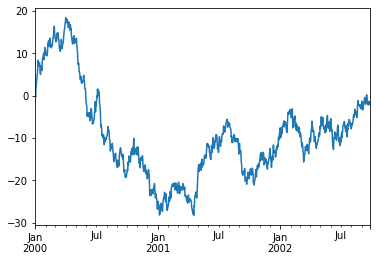

In [301]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [302]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

<Figure size 432x288 with 0 Axes>

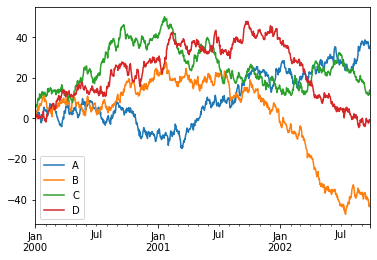

In [303]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

#  CSE :Writing to CSV

In [304]:
df.to_csv('foo.csv')

In [305]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.746,0.509,1.919,-1.056
1,2000-01-02,0.739,1.279,5.160,-0.258
2,2000-01-03,1.623,3.291,5.649,1.157
3,2000-01-04,3.319,3.681,6.576,1.877
4,2000-01-05,3.531,3.069,6.611,1.680
5,2000-01-06,3.456,3.742,6.092,1.550
6,2000-01-07,3.101,3.563,6.436,0.721
7,2000-01-08,3.583,4.032,8.188,0.998
8,2000-01-09,2.505,4.927,9.646,-0.040
9,2000-01-10,1.045,5.790,9.860,-0.086


# HDF5

In [306]:
df.to_hdf('foo.h5','df')

In [307]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.746,0.509,1.919,-1.056
2000-01-02,0.739,1.279,5.160,-0.258
2000-01-03,1.623,3.291,5.649,1.157
2000-01-04,3.319,3.681,6.576,1.877
2000-01-05,3.531,3.069,6.611,1.680
2000-01-06,3.456,3.742,6.092,1.550
2000-01-07,3.101,3.563,6.436,0.721
2000-01-08,3.583,4.032,8.188,0.998
2000-01-09,2.505,4.927,9.646,-0.040
2000-01-10,1.045,5.790,9.860,-0.086


# EXCEL

In [308]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [309]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.746,0.509,1.919,-1.056
1,2000-01-02,0.739,1.279,5.160,-0.258
2,2000-01-03,1.623,3.291,5.649,1.157
3,2000-01-04,3.319,3.681,6.576,1.877
4,2000-01-05,3.531,3.069,6.611,1.680
5,2000-01-06,3.456,3.742,6.092,1.550
6,2000-01-07,3.101,3.563,6.436,0.721
7,2000-01-08,3.583,4.032,8.188,0.998
8,2000-01-09,2.505,4.927,9.646,-0.040
9,2000-01-10,1.045,5.790,9.860,-0.086


##### https://pandas.pydata.org/pandas-docs/version/0.23/10min.html
# 

In [57]:
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Comparison of Pandas With SQL 
##### https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

In [58]:
import pandas as pd
import numpy as np

In [59]:
url = ('https://raw.github.com/pandas-dev''/pandas/master/pandas/tests/data/tips.csv')

In [60]:
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


# SELECT

### In SQL, selection is done using a comma-separated list of columns you’d like to select (or a * to select all columns):

### With pandas, column selection is done by passing a list of column names to your DataFrame:

In [61]:
tips[['total_bill', 'tip', 'smoker', 'time']].head(5)

,total_bill,tip,smoker,time
0,16.990,1.010,No,Dinner
1,10.340,1.660,No,Dinner
2,21.010,3.500,No,Dinner
3,23.680,3.310,No,Dinner
4,24.590,3.610,No,Dinner


# WHERE

## Filtering in SQL is done via a WHERE clause.

In [62]:
tips[tips['time'] == 'Dinner'].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [63]:
is_dinner = tips['time'] == 'Dinner'
is_dinner.value_counts()

True     176
False     68
Name: time, dtype: int64

In [64]:
tips[is_dinner].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [65]:
# Just like SQL’s OR and AND, multiple conditions can be passed to a DataFrame using | (OR) and & (AND).

In [66]:
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)]

,total_bill,tip,sex,smoker,day,time,size
23,39.420,7.580,Male,No,Sat,Dinner,4
44,30.400,5.600,Male,No,Sun,Dinner,4
47,32.400,6.000,Male,No,Sun,Dinner,4
52,34.810,5.200,Female,No,Sun,Dinner,4
59,48.270,6.730,Male,No,Sat,Dinner,4
116,29.930,5.070,Male,No,Sun,Dinner,4
155,29.850,5.140,Female,No,Sun,Dinner,5
170,50.810,10.000,Male,Yes,Sat,Dinner,3
172,7.250,5.150,Male,Yes,Sun,Dinner,2
181,23.330,5.650,Male,Yes,Sun,Dinner,2


In [67]:
tips[(tips['size'] >= 5) | (tips['total_bill'] > 45)]

,total_bill,tip,sex,smoker,day,time,size
59,48.270,6.730,Male,No,Sat,Dinner,4
125,29.800,4.200,Female,No,Thur,Lunch,6
141,34.300,6.700,Male,No,Thur,Lunch,6
142,41.190,5.000,Male,No,Thur,Lunch,5
143,27.050,5.000,Female,No,Thur,Lunch,6
155,29.850,5.140,Female,No,Sun,Dinner,5
156,48.170,5.000,Male,No,Sun,Dinner,6
170,50.810,10.000,Male,Yes,Sat,Dinner,3
182,45.350,3.500,Male,Yes,Sun,Dinner,3
185,20.690,5.000,Male,No,Sun,Dinner,5


# NULL checking is done using the notna() and isna() methods.

In [68]:
frame = pd.DataFrame({'col1': ['A', 'B', np.NaN, 'C', 'D'],
                          'col2': ['F', np.NaN, 'G', 'H', 'I']})
frame

,col1,col2
0,A,F
1,B,NaN
2,NaN,G
3,C,H
4,D,I


In [69]:
frame[frame['col2'].isna()]

,col1,col2
1,B,NaN


In [70]:
frame[frame['col1'].notna()]

,col1,col2
0,A,F
1,B,NaN
3,C,H
4,D,I


# GROUP BY

In [71]:
tips.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [72]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


In [73]:
tips.groupby('sex')['total_bill'].count()

sex
Female     87
Male      157
Name: total_bill, dtype: int64

In [74]:
tips.groupby('day').agg({'tip': np.mean, 'day': np.size})

,tip,day
day,,
Fri,2.735,19
Sat,2.993,87
Sun,3.255,76
Thur,2.771,62


In [75]:
tips.groupby(['smoker', 'day']).agg({'tip': [np.size, np.mean]})

tip      
              size  mean
smoker day              
No     Fri   4.000 2.812
       Sat  45.000 3.103
       Sun  57.000 3.168
       Thur 45.000 2.674
Yes    Fri  15.000 2.714
       Sat  42.000 2.875
       Sun  19.000 3.517
       Thur 17.000 3.030

# JOIN

In [76]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                     'value': np.random.randn(4)})

In [77]:
df1

,key,value
0,A,0.275
1,B,0.854
2,C,-2.026
3,D,0.588


In [78]:
df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'],'value': np.random.randn(4)})

In [79]:
df2

,key,value
0,B,-0.503
1,D,0.728
2,D,1.724
3,E,-1.823


# INNER JOIN

In [80]:
# merge performs an INNER JOIN by default
pd.merge(df1, df2, on='key')

,key,value_x,value_y
0,B,0.854,-0.503
1,D,0.588,0.728
2,D,0.588,1.724


In [82]:
indexed_df2 = df2.set_index('key')
pd.merge(df1, indexed_df2, left_on='key', right_index=True)

,key,value_x,value_y
1,B,0.854,-0.503
3,D,0.588,0.728
3,D,0.588,1.724


# LEFT OUTER JOIN

In [90]:
print("df1:\n",df1)
print("df2:\n",df2,"\n")
# show all records from df1
print("Left Merged df1 and df2: ")
pd.merge(df1,df2, on='key', how='left')

df1:
   key  value
0   A  0.275
1   B  0.854
2   C -2.026
3   D  0.588
df2:
   key  value
0   B -0.503
1   D  0.728
2   D  1.724
3   E -1.823 

Left Merged df1 and df2: 


,key,value_x,value_y
0,A,0.275,nan
1,B,0.854,-0.503
2,C,-2.026,nan
3,D,0.588,0.728
4,D,0.588,1.724


# RIGHT JOIN

In [91]:
# show all records from df2
pd.merge(df1, df2, on='key', how='right')

,key,value_x,value_y
0,B,0.854,-0.503
1,D,0.588,0.728
2,D,0.588,1.724
3,E,nan,-1.823


# FULL JOIN

In [92]:
# show all records from both frames
pd.merge(df1, df2, on='key', how='outer')

,key,value_x,value_y
0,A,0.275,nan
1,B,0.854,-0.503
2,C,-2.026,nan
3,D,0.588,0.728
4,D,0.588,1.724
5,E,nan,-1.823


# UNION

UNION ALL can be performed using concat().

In [93]:
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'],
                     'rank': range(1, 4)})


df2 = pd.DataFrame({'city': ['Chicago', 'Boston', 'Los Angeles'],
                     'rank': [1, 4, 5]})

In [94]:
df1

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3


In [95]:
df2

,city,rank
0,Chicago,1
1,Boston,4
2,Los Angeles,5


In [96]:
pd.concat([df1, df2])

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
0,Chicago,1
1,Boston,4
2,Los Angeles,5


##### SQL’s UNION is similar to UNION ALL, however UNION will remove duplicate rows.

##### In pandas, you can use concat() in conjunction with drop_duplicates().

In [97]:
pd.concat([df1, df2]).drop_duplicates()

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
1,Boston,4
2,Los Angeles,5


# Pandas equivalents for some SQL analytic and aggregate functions

#### Top N rows with offset

In [98]:
tips.nlargest(10 + 5, columns='tip').tail(10)

,total_bill,tip,sex,smoker,day,time,size
183,23.170,6.500,Male,Yes,Sun,Dinner,4
214,28.170,6.500,Female,Yes,Sat,Dinner,3
47,32.400,6.000,Male,No,Sun,Dinner,4
239,29.030,5.920,Male,No,Sat,Dinner,3
88,24.710,5.850,Male,No,Thur,Lunch,2
181,23.330,5.650,Male,Yes,Sun,Dinner,2
44,30.400,5.600,Male,No,Sun,Dinner,4
52,34.810,5.200,Female,No,Sun,Dinner,4
85,34.830,5.170,Female,No,Thur,Lunch,4
211,25.890,5.160,Male,Yes,Sat,Dinner,4


### Top N rows per group

#### -- Oracle's ROW_NUMBER() analytic function

In [102]:
(tips.assign(rn=tips.sort_values(['total_bill'], ascending=False)
                    .groupby(['day'])
                    .cumcount() + 1)
      .query('rn < 3')
      .sort_values(['day', 'rn']))

,total_bill,tip,sex,smoker,day,time,size,rn
95,40.170,4.730,Male,Yes,Fri,Dinner,4,1
90,28.970,3.000,Male,Yes,Fri,Dinner,2,2
170,50.810,10.000,Male,Yes,Sat,Dinner,3,1
212,48.330,9.000,Male,No,Sat,Dinner,4,2
156,48.170,5.000,Male,No,Sun,Dinner,6,1
182,45.350,3.500,Male,Yes,Sun,Dinner,3,2
197,43.110,5.000,Female,Yes,Thur,Lunch,4,1
142,41.190,5.000,Male,No,Thur,Lunch,5,2


#### the same using rank(method=’first’) function

In [103]:
(tips.assign(rnk=tips.groupby(['day'])['total_bill']
                      .rank(method='first', ascending=False))
      .query('rnk < 3')
      .sort_values(['day', 'rnk']))

,total_bill,tip,sex,smoker,day,time,size,rnk
95,40.170,4.730,Male,Yes,Fri,Dinner,4,1.000
90,28.970,3.000,Male,Yes,Fri,Dinner,2,2.000
170,50.810,10.000,Male,Yes,Sat,Dinner,3,1.000
212,48.330,9.000,Male,No,Sat,Dinner,4,2.000
156,48.170,5.000,Male,No,Sun,Dinner,6,1.000
182,45.350,3.500,Male,Yes,Sun,Dinner,3,2.000
197,43.110,5.000,Female,Yes,Thur,Lunch,4,1.000
142,41.190,5.000,Male,No,Thur,Lunch,5,2.000


##### -- Oracle's RANK() analytic function

-- Oracle's RANK() analytic function
SELECT * FROM (
  SELECT
    t.*,
    RANK() OVER(PARTITION BY sex ORDER BY tip) AS rnk
  FROM tips t
  WHERE tip < 2
)
WHERE rnk < 3
ORDER BY sex, rnk;

#####  Let’s find tips with (rank < 3) per gender group for (tips < 2). Notice that when using rank(method='min') function rnk_min remains the same for the same tip (as Oracle’s RANK() function)

In [105]:
(tips[tips['tip'] < 2]
     .assign(rnk_min=tips.groupby(['sex'])['tip']
                         .rank(method='min'))
     .query('rnk_min < 3')
     .sort_values(['sex', 'rnk_min']))

,total_bill,tip,sex,smoker,day,time,size,rnk_min
67,3.070,1.000,Female,Yes,Sat,Dinner,1,1.000
92,5.750,1.000,Female,Yes,Fri,Dinner,2,1.000
111,7.250,1.000,Female,No,Sat,Dinner,1,1.000
236,12.600,1.000,Male,Yes,Sat,Dinner,2,1.000
237,32.830,1.170,Male,Yes,Sat,Dinner,2,2.000


# UPDATE

In [106]:
tips.loc[tips['tip'] < 2, 'tip'] *= 2

In [108]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,2.020,Female,No,Sun,Dinner,2
1,10.340,3.320,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


# DELETE

In [116]:
tips = tips.loc[tips['tip'] <= 2]

In [117]:
tips

,total_bill,tip,sex,smoker,day,time,size
6,8.770,2.000,Male,No,Sun,Dinner,2
26,13.370,2.000,Male,No,Sat,Dinner,2
27,12.690,2.000,Male,No,Sat,Dinner,2
36,16.310,2.000,Male,No,Sat,Dinner,3
61,13.810,2.000,Male,Yes,Sat,Dinner,2
67,3.070,2.000,Female,Yes,Sat,Dinner,1
86,13.030,2.000,Male,No,Thur,Lunch,2
92,5.750,2.000,Female,Yes,Fri,Dinner,2
111,7.250,2.000,Female,No,Sat,Dinner,1
123,15.950,2.000,Male,No,Thur,Lunch,2


# Cyber Pandas
#### https://cyberpandas.readthedocs.io/en/latest/

In [119]:
pip install cyberpandas

Note: you may need to restart the kernel to use updated packages.


In [120]:
from cyberpandas import IPArray

In [122]:
import pandas as pd

arr = IPArray(['192.168.1.1','2001:0db8:85a3:0000:0000:8a2e:0370:7334'])
arr

IPArray(['192.168.1.1', '2001:db8:85a3::8a2e:370:7334'])

In [123]:
pd.Series(arr)

0                     192.168.1.1
1    2001:db8:85a3::8a2e:370:7334
dtype: ip

In [124]:
pd.DataFrame({"addresses": arr})

,addresses
0,192.168.1.1
1,2001:db8:85a3::8a2e:370:7334


# Pandas Ecosystem
#### https://pandas.pydata.org/pandas-docs/stable/ecosystem.html